# General Info

This jupyter notebook demonstrates how to run the genotype-to-phenotype (G2P) simulations for linear regression (LR), fully-connected network (FCN), and Biologically-inspired graph neural network (GNN). To run it through command line, simply run 
    python ./G2P_Model.py case
where case is the name of the particular setup you want to run. To view the 
available cases and their details see file "G2P_Model_Cases.py". To create a 
new case, add the case with its name and parameters to the same file. 

In general, a G2P simulation follows  the steps below:
 - Step 1.0: Define an appropriate object and load the details of the case specified
by the user. The case will dictate the equations to be used, the number of different
cases (Nruns), each with different parameters in the evolution equations and with a 
total population of Np individual plants per case. 

 - Step 1.1: Generate the starting germplasm (initial plant population) for each
one of the total (Nruns) cases.

 - Step 2: Use part of the generated germplasm to train all models (LR, FCN, GNN), one for each one of the 
 Nruns cases. Details about the various architectures and hyperparameters are set
 by the specified case parameters in "G2P_Model_Cases.py". File "G2PNet_Train.py"
 is called for each run separately and creates a batch file that is submitted as 
 an independent process. The batch file calls G2PNet.py and the architecture of the
 model is in G2PNet_Architecture.py. 
  
  - Step 3: Gather data needed to plot results and save them. For details regarding
  gathering the data, see file "_Plotting_Data.py"

@author: Alexis Charalampopoulos <alexcharalamp@gmail.com>, or <alexis-tzianni.charalampopoulos@bayer.com>.

# Import necessary libraries

In [1]:
import os
import sys
import time

from G2P_Model_Cases import Define_G2P_Model
from G2P_Model_Class import g2p_model

os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Github/Shoot_Branching_Toy/Python_Code/') # Change this path to your local directory
print('Current directory:', os.getcwd())

Current directory: /Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Github/Shoot_Branching_Toy/Python_Code


# 1. Specify test-case scenario and generate Germplasm. 

In [2]:
user_input = [] # Initialize a list for user input. 
Nruns = 3 # Number of independent numerical experiments you want to simulate. 
case  = 'statistical_reproduction' # plot_reproduction, statistical_reproduction
run_type = 'notebook'
network_name = 'SB_Network' # The name of the file that contains the edges and node names of the metabolic network. 
output_variable = 'T' # The name of the output node. 
user_input.append("") # Empty argument. - to be removed
user_input.append(case) # Test-case you want to run. See file "G2P_Model_Cases.py" 
user_input.append(Nruns)
user_input.append(network_name)
user_input.append(output_variable)
user_input.append(run_type)

#--------------------------------------------------------------------------
#--------- Step 1.0: Define an object for the simulations -----------------
config = {} # Initialize an object for the simulation.
# Via the user input, find the extra modelling parameters from "Test_Cases.py"
config = Define_G2P_Model(config,user_input) # Grab the parameters of the test case you want to run. 
mymodel = g2p_model(config) # Initialize a simulation object. 

#--------------------------------------------------------------------------
#--------------- Step 1.1: Generate Germplasm for all cases ---------------
mymodel.Germplasm_Generation()

# 2. Train models 

In [3]:
tested_architectures = ['FCN','LR','GNN']# Architectures to be tested - Change GNN to Bio-GNN

# Submit processes for training each computational model.
for model in tested_architectures:
    mymodel.architecture = model
    mymodel.G2P_Training(0) # Submit training jobs.

Training FCN model for germplasm simulation #0 of 3 ... 

/Users/gopwp/miniconda3/envs/genome_modelling/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


completed in 20 [sec]
Training FCN model for germplasm simulation #1 of 3 ... completed in 20 [sec]
Training FCN model for germplasm simulation #2 of 3 ... completed in 19 [sec]
Training LR model for germplasm simulation #0 of 3 ... completed in 10 [sec]
Training LR model for germplasm simulation #1 of 3 ... completed in 10 [sec]
Training LR model for germplasm simulation #2 of 3 ... completed in 10 [sec]
Training GNN model for germplasm simulation #0 of 3 ... completed in 14 [sec]
Training GNN model for germplasm simulation #1 of 3 ... completed in 14 [sec]
Training GNN model for germplasm simulation #2 of 3 ... completed in 14 [sec]


# 3. Test models and generate validation metrics

In [4]:
tested_architectures = ['FCN','LR','GNN']# Architectures to be tested

# Use trained models for inference on testing data. 
for model in tested_architectures:
    mymodel.architecture = model
    mymodel.G2P_Breeding(0) # Submit inference jobs.

Testing FCN model for germplasm simulation #0 of 3 ... done
Testing FCN model for germplasm simulation #1 of 3 ... done
Testing FCN model for germplasm simulation #2 of 3 ... done
Testing LR model for germplasm simulation #0 of 3 ... done
Testing LR model for germplasm simulation #1 of 3 ... done
Testing LR model for germplasm simulation #2 of 3 ... done
Testing GNN model for germplasm simulation #0 of 3 ... done
Testing GNN model for germplasm simulation #1 of 3 ... done
Testing GNN model for germplasm simulation #2 of 3 ... done


# 4. Plot results

In [5]:
# Create scatterplots comparing each trained model with observations for testing data. 
mymodel.G2P_Plotting_Script()

MAE for LR: 0.5591551405324, FCN: 0.6532874451704884, GNN: 0.5665497044320168
MAE-std for LR: 0.03708884070182959, FCN: 0.02004245315757425, GNN: 0.029001016115649744
MSE for LR: 0.7038770133637716, FCN: 0.8275544254471464, GNN: 0.7202683089443436
MSE-std for LR: 0.05150541816521241, FCN: 0.017799097799962475, GNN: 0.03340139178759582


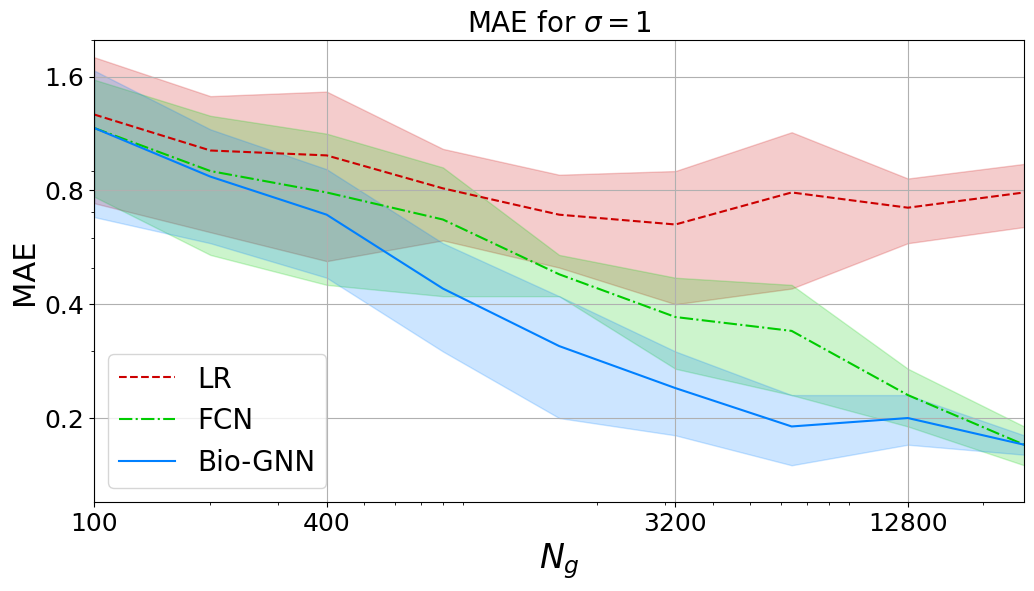

In [8]:
# Plot results for different number of training samples
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 20


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
ax = fig.subplots()

Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mae  = [1.27, 1.02, 0.99, 0.81, 0.69, 0.65, 0.79, 0.72, 0.79]
LR_mae_std = [0.53, 0.40, 0.47, 0.22, 0.19, 0.25, 0.35, 0.14, 0.15]
LR_mae_min = []
LR_mae_max = []
for ii in range(0,len(Ngs)):
    LR_mae_min.append(LR_mae[ii]-LR_mae_std[ii])
    LR_mae_max.append(LR_mae[ii]+LR_mae_std[ii])

FCN_mae = [1.17, 0.90, 0.79, 0.67, 0.48, 0.37, 0.34, 0.23, 0.17]
FCN_mae_std = [0.40, 0.36, 0.34, 0.25, 0.06, 0.10, 0.11, 0.04, 0.02]
FCN_mae_min = []
FCN_mae_max = []
for ii in range(0,len(Ngs)):
    FCN_mae_min.append(FCN_mae[ii]-FCN_mae_std[ii])
    FCN_mae_max.append(FCN_mae[ii]+FCN_mae_std[ii])

GNN_mae     = [1.17, 0.87, 0.69, 0.44, 0.31, 0.24, 0.19, 0.20, 0.17]
GNN_mae_std = [0.49, 0.29, 0.22, 0.14, 0.11, 0.06, 0.04, 0.03, 0.01]
GNN_mae_min = []
GNN_mae_max = []
for ii in range(0,len(Ngs)):
    GNN_mae_min.append(GNN_mae[ii]-GNN_mae_std[ii])
    GNN_mae_max.append(GNN_mae[ii]+GNN_mae_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
plt.plot(Ngs,LR_mae[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
plt.plot(Ngs,FCN_mae[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

plt.plot(Ngs,GNN_mae[:],linestyle='-' ,color=[0.0,0.5,1.0])

plt.fill_between(Ngs, LR_mae_max, LR_mae_min, color=[0.8,0,0], alpha=0.2)
plt.fill_between(Ngs, FCN_mae_max, FCN_mae_min, color=[0,0.8,0], alpha=0.2)
plt.fill_between(Ngs, GNN_mae_max, GNN_mae_min, color=[0,0.5,1], alpha=0.2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
plt.legend(['LR','FCN','Bio-GNN'],loc='lower left')
plt.grid('on')
plt.xscale('log')
plt.yscale('log')
ax.set_xticks([100, 400, 3200, 12800])
ax.set_xticklabels([100, 400, 3200, 12800],fontsize=18)
ax.set_yticks([0.1,0.2,0.4,0.8,1.6])
ax.set_yticklabels([0.1,0.2,0.4,0.8,1.6],fontsize=18)
ax.set_ylim([0.12,2.0])
ax.set_xlim([100,25600])
ax.set_ylabel('MAE',fontsize=22)
ax.set_xlabel('$N_g$',fontsize=24)
ax.set_title('MAE for $\sigma=1$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))
plt.savefig('Different_Training_Samples_MAE.png', dpi=150, bbox_inches='tight') 

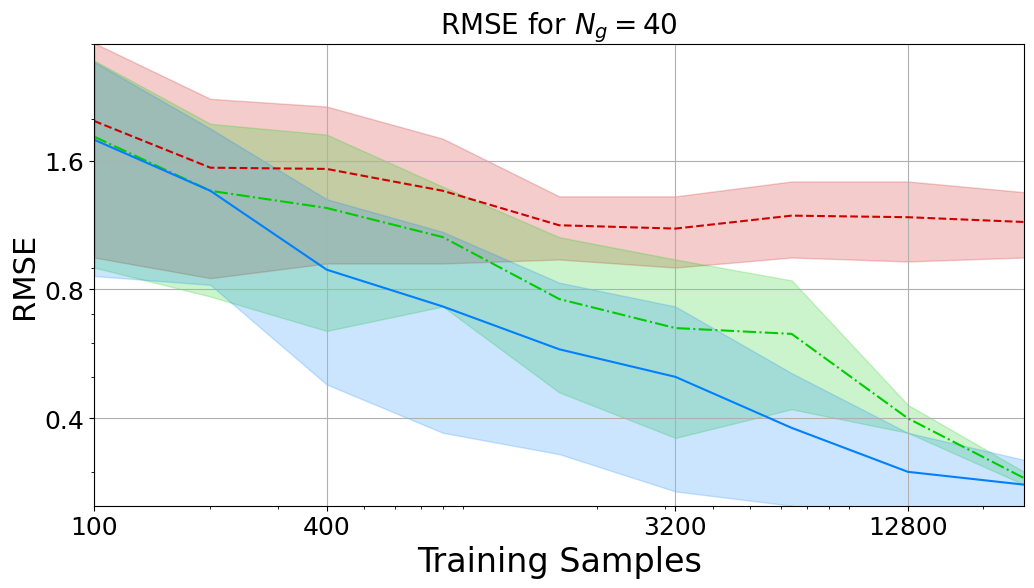

In [31]:
# Plot results for different number of training samples
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 20


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
ax = fig.subplots()

Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mse  = [1.98, 1.54, 1.53, 1.36, 1.13, 1.11, 1.19, 1.18, 1.15]
LR_mse_std = [1.03, 0.69, 0.61, 0.44, 0.19, 0.21, 0.24, 0.25, 0.20]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [1.82, 1.36, 1.24, 1.06, 0.76, 0.65, 0.63, 0.40, 0.29]
FCN_mse_std = [0.92, 0.59, 0.60, 0.33, 0.30, 0.29, 0.21, 0.03, 0.01]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [1.79, 1.36, 0.89, 0.73, 0.58, 0.50, 0.38, 0.30, 0.28]
GNN_mse_std = [0.93, 0.54, 0.41, 0.36, 0.25, 0.23, 0.13, 0.07, 0.04]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
plt.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
plt.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

plt.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

plt.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
plt.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
plt.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#plt.legend(['LR','FCN','Bio-GNN'],loc='lower left')
plt.grid('on')
plt.xscale('log')
plt.yscale('log')
ax.set_xticks([100, 400, 3200, 12800])
ax.set_xticklabels([100, 400, 3200, 12800],fontsize=18)
ax.set_yticks([0.1,0.2,0.4,0.8,1.6])
ax.set_yticklabels([0.1,0.2,0.4,0.8,1.6],fontsize=18)
ax.set_ylim([0.25,3.0])
ax.set_xlim([100,25600])
ax.set_ylabel('RMSE',fontsize=22)
ax.set_xlabel('Training Samples',fontsize=24)
ax.set_title('RMSE for $N_g=40$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))
plt.savefig('Different_Training_Samples_MSE.png', dpi=150, bbox_inches='tight') 

In [5]:
import os
import pandas as pd

os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Github/Shoot_Branching_Toy/Python_Code/') # Change this path to your local directory
print('Current directory:', os.getcwd())

input_nodes = ['Genome','Genome','Genome','Genome','A','S','CK_basis','A','SL_basis','S','CK','SL','I']

output_nodes = ['A','S','CK_basis','SL_basis','CK','CK','CK','SL','SL','I','I','I','T']

func_data = {"input_node":input_nodes[:], 'output_node':output_nodes[:]}
fdf = pd.DataFrame.from_dict(func_data)
fdf.to_csv('../Data/Network_Data/SB_Network.csv',index=True)


Current directory: /Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Github/Shoot_Branching_Toy/Python_Code


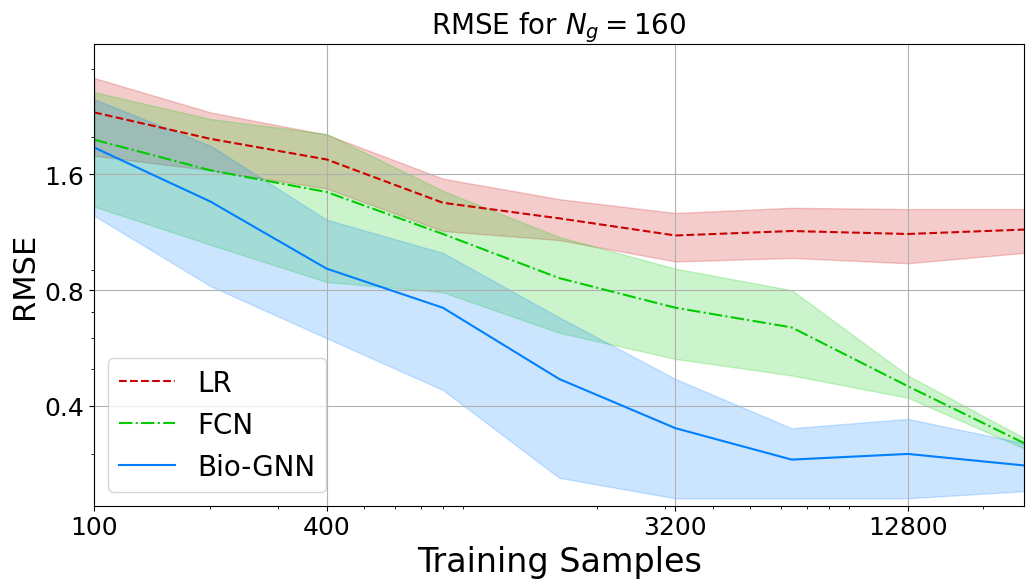

In [29]:
# Plot results for different number of training samples
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 20


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
ax = fig.subplots()

Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mse  = [2.32, 1.98, 1.75, 1.35, 1.23, 1.11, 1.14, 1.12, 1.15]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16, 0.17, 0.18, 0.15]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [1.97, 1.64, 1.44, 1.12, 0.86, 0.72, 0.64, 0.45, 0.32]
FCN_mse_std = [0.65, 0.59, 0.60, 0.33, 0.24, 0.19, 0.16, 0.03, 0.01]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [1.88, 1.36, 0.91, 0.72, 0.47, 0.35, 0.29, 0.30, 0.28]
GNN_mse_std = [0.63, 0.54, 0.31, 0.28, 0.21, 0.12, 0.06, 0.07, 0.04]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
plt.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
plt.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

plt.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

plt.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
plt.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
plt.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
plt.legend(['LR','FCN','Bio-GNN'],loc='lower left')
plt.grid('on')
plt.xscale('log')
plt.yscale('log')
ax.set_xticks([100, 400, 3200, 12800])
ax.set_xticklabels([100, 400, 3200, 12800],fontsize=18)
ax.set_yticks([0.1,0.2,0.4,0.8,1.6])
ax.set_yticklabels([0.1,0.2,0.4,0.8,1.6],fontsize=18)
ax.set_ylim([0.22,3.5])
ax.set_xlim([100,25600])
ax.set_ylabel('RMSE',fontsize=22)
ax.set_xlabel('Training Samples',fontsize=24)
ax.set_title('RMSE for $N_g=160$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))
plt.savefig('Different_Training_Samples_MSE_Ng160.png', dpi=150, bbox_inches='tight') 

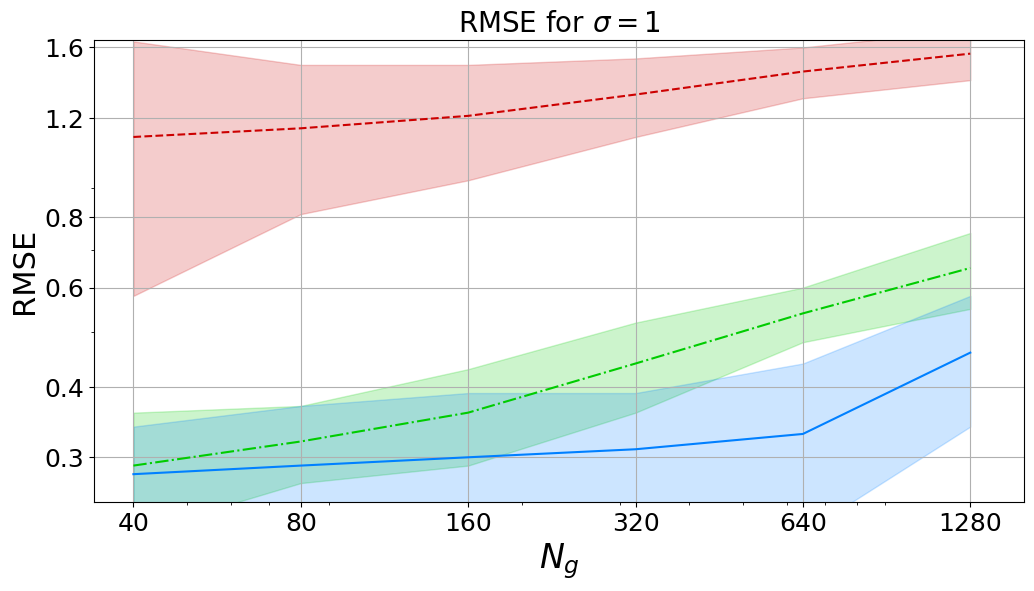

In [28]:
# Plot results for different number of training samples
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 20


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
ax = fig.subplots()

Ngs     = [40, 80, 160, 320, 640, 1280]
LR_mse  = [1.11, 1.15, 1.21, 1.32, 1.45, 1.56]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [0.29, 0.32, 0.36, 0.44, 0.54, 0.65]
FCN_mse_std = [0.07, 0.05, 0.07, 0.08, 0.06, 0.10]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [0.28, 0.29, 0.30, 0.31, 0.33, 0.46]
GNN_mse_std = [0.06, 0.08, 0.09, 0.08, 0.11, 0.12]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
plt.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
plt.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

plt.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

plt.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
plt.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
plt.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#plt.legend(['LR','FCN','Bio-GNN'],loc='upper left')
plt.grid('on')
plt.xscale('log')
plt.yscale('log')
ax.set_xticks([40, 80, 160, 320, 640, 1280])
ax.set_xticklabels([40, 80, 160, 320, 640, 1280],fontsize=18)
ax.set_yticks([0.3,0.4,0.6,0.8,1.2,1.6])
ax.set_yticklabels([0.3,0.4,0.6,0.8,1.2,1.6],fontsize=18)
ax.set_ylim([0.25,1.65])
ax.set_xlim([34,1600])
ax.set_ylabel('RMSE',fontsize=22)
ax.set_xlabel('$N_g$',fontsize=24)
ax.set_title('RMSE for $\sigma = 1$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))
plt.savefig('Different_Ng_sigma1.png', dpi=150, bbox_inches='tight') 

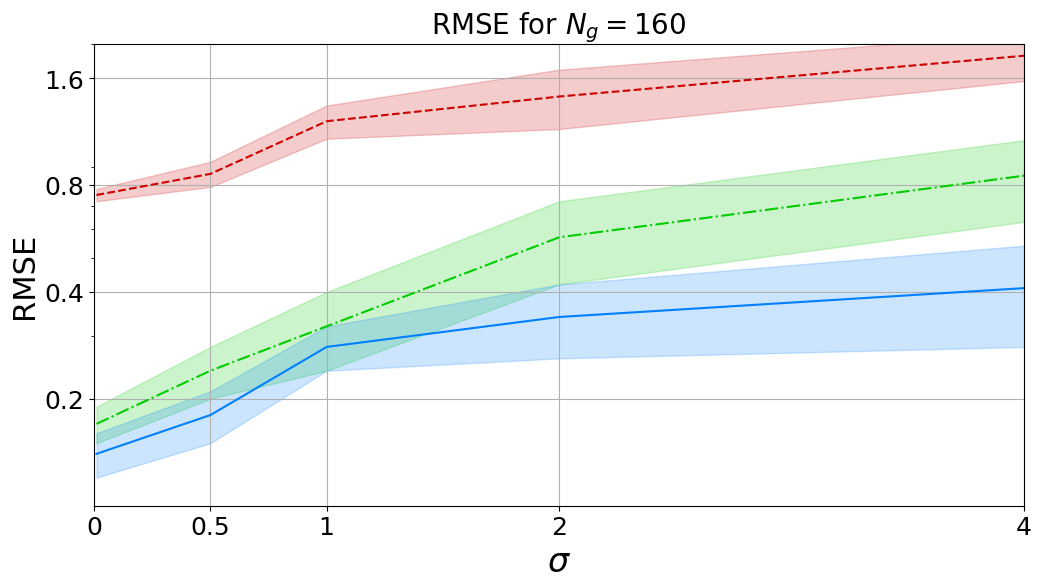

In [1]:
# Plot results for different number of training samples
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 20


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
ax = fig.subplots()

Ngs     = [0.01, 0.50, 1.00, 2.00, 4.00]
LR_mse  = [0.75, 0.86, 1.21, 1.42, 1.85]
LR_mse_std = [0.03, 0.07, 0.13, 0.27, 0.28]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [0.17, 0.24, 0.32, 0.57, 0.85]
FCN_mse_std = [0.02, 0.04, 0.08, 0.15, 0.22]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [0.14, 0.18, 0.28, 0.34, 0.41]
GNN_mse_std = [0.02, 0.03, 0.04, 0.08, 0.13]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
plt.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
plt.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

plt.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

plt.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
plt.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
plt.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#plt.legend(['LR','FCN','Bio-GNN'],loc='upper left')
plt.grid('on')
#plt.xscale('log')
plt.yscale('log')
ax.set_xticks([0.0, 0.50, 1, 2, 4])
ax.set_xticklabels([0, 0.50, 1, 2, 4],fontsize=18)
ax.set_yticks([0.2, 0.4,0.8,1.6])
ax.set_yticklabels([0.2, 0.4,0.8,1.6],fontsize=18)
ax.set_ylim([0.10,2])
ax.set_xlim([0,4])
ax.set_ylabel('RMSE',fontsize=22)
ax.set_xlabel('$\sigma$',fontsize=24)
ax.set_title('RMSE for $N_g = 160$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))
plt.savefig('Different_sigma_Ng160.png', dpi=150, bbox_inches='tight') 

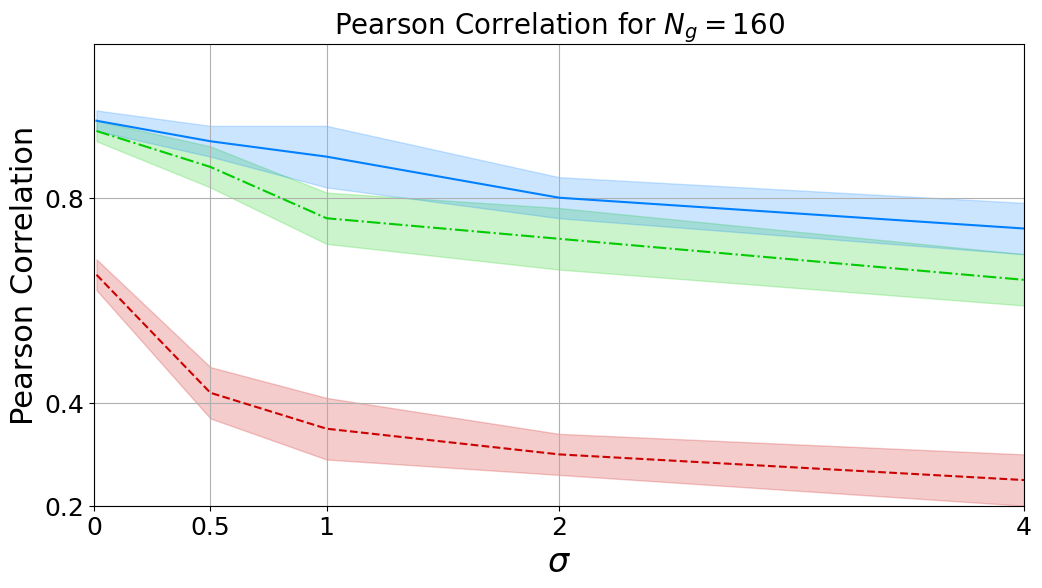

In [16]:
# Correlation Plot
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 20


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
ax = fig.subplots()

Ngs     = [0.01, 0.50, 1.00, 2.00, 4.00]
LR_mse  = [0.65, 0.42, 0.35, 0.30, 0.25]
LR_mse_std = [0.03, 0.05, 0.06, 0.04, 0.05]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [0.93, 0.86, 0.76, 0.72, 0.64]
FCN_mse_std = [0.02, 0.04, 0.05, 0.06, 0.05]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [0.95, 0.91, 0.88, 0.80, 0.74]
GNN_mse_std = [0.02, 0.03, 0.06, 0.04, 0.05]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
plt.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
plt.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

plt.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

plt.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
plt.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
plt.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#plt.legend(['LR','FCN','Bio-GNN'],loc='upper left')
plt.grid('on')
#plt.xscale('log')
#plt.yscale('log')
ax.set_xticks([0.0, 0.50, 1, 2, 4])
ax.set_xticklabels([0, 0.50, 1, 2, 4],fontsize=18)
ax.set_yticks([0.2, 0.4,0.8,1.6])
ax.set_yticklabels([0.2, 0.4,0.8,1.6],fontsize=18)
ax.set_ylim([0.20,1.10])
ax.set_xlim([0,4])
ax.set_ylabel('Pearson Correlation',fontsize=22)
ax.set_xlabel('$\sigma$',fontsize=24)
ax.set_title('Pearson Correlation for $N_g = 160$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))
plt.savefig('Different_sigma_Ng160_Correlation.png', dpi=150, bbox_inches='tight') 

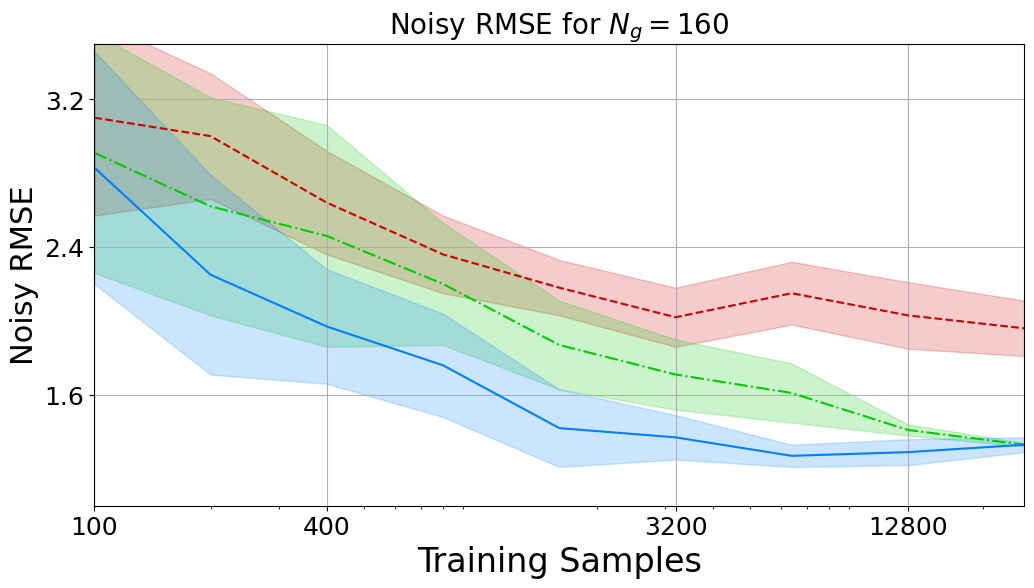

In [27]:
# Noisy RMSE plot
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 20


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
ax = fig.subplots()

Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mse  = [2.32+0.78, 1.98+1.02, 1.75+0.89, 1.35+1.01, 1.23+0.95, 1.11+0.91, 1.14+1.01, 1.12+0.91, 1.15+0.81]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16, 0.17, 0.18, 0.15]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [1.97+0.94, 1.64+0.98, 1.44+1.02, 1.12+1.08, 0.86+1.01, 0.72+0.99, 0.64+0.97, 0.45+0.96, 0.32+1.01]
FCN_mse_std = [0.65, 0.59, 0.60, 0.33, 0.24, 0.19, 0.16, 0.03, 0.01]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [1.88+0.95, 1.36+0.89, 0.91+1.06, 0.72+1.04, 0.47+0.95, 0.35+1.02, 0.29+0.98, 0.30+0.99, 0.28+1.05]
GNN_mse_std = [0.63, 0.54, 0.31, 0.28, 0.21, 0.12, 0.06, 0.07, 0.04]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
plt.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
plt.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

plt.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

plt.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
plt.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
plt.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#plt.legend(['LR','FCN','Bio-GNN'],loc='lower left')
plt.grid('on')
plt.xscale('log')
#plt.yscale('log')
ax.set_xticks([100, 400, 3200, 12800])
ax.set_xticklabels([100, 400, 3200, 12800],fontsize=18)
ax.set_yticks([1.6,2.4,3.2])
ax.set_yticklabels([1.6,2.4,3.2],fontsize=18)
ax.set_ylim([01.00,3.5])
ax.set_xlim([100,25600])
ax.set_ylabel('Noisy RMSE',fontsize=22)
ax.set_xlabel('Training Samples',fontsize=24)
ax.set_title('Noisy RMSE for $N_g=160$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))
plt.savefig('Different_Training_Samples_Noisy_RMSE_Ng160.png', dpi=150, bbox_inches='tight') 

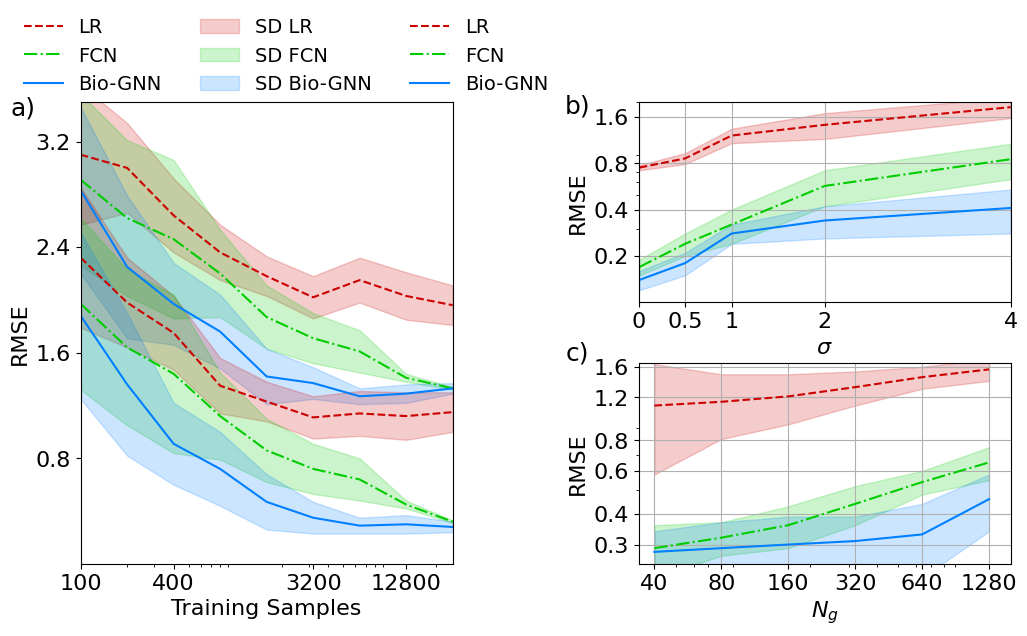

In [96]:
# NeurIPS shootbranching plot
from matplotlib import pylab as plt
import pandas as pd
import os
import numpy as np
import matplotlib.gridspec as gridspec
os.chdir('/Users/gopwp/Documents/Graph_Neural_Network/Toy_Model_Paper/Python_Code/') # Change this path to your local directory

font_size = 16


plt.rcParams.update({'font.size': font_size})
fig = plt.figure(figsize=(12,6))
#gs = fig.add_gridspec(4, hspace=0.2)
#ax = fig.subplots()

gs = gridspec.GridSpec(9, 2)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0:9, :1])
ax2 = plt.subplot(gs[0:4, 1:])
ax3 = plt.subplot(gs[5:9, 1:])


Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mse  = [2.32+0.78, 1.98+1.02, 1.75+0.89, 1.35+1.01, 1.23+0.95, 1.11+0.91, 1.14+1.01, 1.12+0.91, 1.15+0.81]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16, 0.17, 0.18, 0.15]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [1.97+0.94, 1.64+0.98, 1.44+1.02, 1.12+1.08, 0.86+1.01, 0.72+0.99, 0.64+0.97, 0.45+0.96, 0.32+1.01]
FCN_mse_std = [0.65, 0.59, 0.60, 0.33, 0.24, 0.19, 0.16, 0.03, 0.01]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [1.88+0.95, 1.36+0.89, 0.91+1.06, 0.72+1.04, 0.47+0.95, 0.35+1.02, 0.29+0.98, 0.30+0.99, 0.28+1.05]
GNN_mse_std = [0.63, 0.54, 0.31, 0.28, 0.21, 0.12, 0.06, 0.07, 0.04]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
ax1.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
ax1.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

ax1.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

ax1.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
ax1.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
ax1.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)




Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mse  = [2.32, 1.98, 1.75, 1.35, 1.23, 1.11, 1.14, 1.12, 1.15]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16, 0.17, 0.18, 0.15]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [1.97, 1.64, 1.44, 1.12, 0.86, 0.72, 0.64, 0.45, 0.32]
FCN_mse_std = [0.65, 0.59, 0.60, 0.33, 0.24, 0.19, 0.16, 0.03, 0.01]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [1.88, 1.36, 0.91, 0.72, 0.47, 0.35, 0.29, 0.30, 0.28]
GNN_mse_std = [0.63, 0.54, 0.31, 0.28, 0.21, 0.12, 0.06, 0.07, 0.04]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
ax1.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
ax1.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

ax1.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

ax1.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
ax1.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
ax1.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)
ax1.text(35, 3.4, 'a)', fontsize=font_size+2)


# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.00, box.height])

# Put a legend to the right of the current axis
ax1.legend(['LR','FCN','Bio-GNN','SD LR','SD FCN','SD Bio-GNN','LR','FCN','Bio-GNN'], loc='center left', bbox_to_anchor=(-0.20, 1.10), ncols=3, frameon=False, fontsize=font_size-2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#ax1.legend(['LR','FCN','Bio-GNN'],loc='lower left')
#plt.grid('on')
ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.set_xticks([100, 400, 3200, 12800])
ax1.set_xticklabels([100, 400, 3200, 12800],fontsize=font_size)
ax1.set_yticks([0.8,1.6,2.4,3.2])
ax1.set_yticklabels([0.8,1.6,2.4,3.2],fontsize=font_size)
ax1.set_ylim([0.,3.5])
ax1.set_xlim([100,25600])
ax1.set_ylabel('RMSE',fontsize=font_size)
ax1.set_xlabel('Training Samples',fontsize=font_size)
#ax1.set_title('Noisy RMSE for $N_g=160$',fontsize=font_size)
#asx[0,0].set(ylim=[220,260])
#plt.set(xlabel='', ylabel='YLD (bu/acr)',title='Results for RM '+str(samp_label[0]))



# Noise data
Ngs     = [0.01, 0.50, 1.00, 2.00, 4.00]
LR_mse  = [0.75, 0.86, 1.21, 1.42, 1.85]
LR_mse_std = [0.03, 0.07, 0.13, 0.27, 0.28]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [0.17, 0.24, 0.32, 0.57, 0.85]
FCN_mse_std = [0.02, 0.04, 0.08, 0.15, 0.22]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [0.14, 0.18, 0.28, 0.34, 0.41]
GNN_mse_std = [0.02, 0.03, 0.04, 0.08, 0.13]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
ax2.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
ax2.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

ax2.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

ax2.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
ax2.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
ax2.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)
ax2.text(-0.80, 1.7, 'b)', fontsize=font_size+2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#plt.legend(['LR','FCN','Bio-GNN'],loc='upper left')
ax2.grid('on')
#plt.xscale('log')
ax2.set_yscale('log')
ax2.set_xticks([0.0, 0.50, 1, 2, 4])
ax2.set_xticklabels([0, 0.50, 1, 2, 4],fontsize=font_size)
ax2.set_yticks([0.2, 0.4,0.8,1.6])
ax2.set_yticklabels([0.2, 0.4,0.8,1.6],fontsize=font_size)
ax2.set_ylim([0.10,2])
ax2.set_xlim([0,4])
ax2.set_ylabel('RMSE',fontsize=font_size)
ax2.set_xlabel('$\sigma$',fontsize=font_size)
#ax2.set_title('RMSE for $N_g = 160$',fontsize=font_size)






Ngs     = [40, 80, 160, 320, 640, 1280]
LR_mse  = [1.11, 1.15, 1.21, 1.32, 1.45, 1.56]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [0.29, 0.32, 0.36, 0.44, 0.54, 0.65]
FCN_mse_std = [0.07, 0.05, 0.07, 0.08, 0.06, 0.10]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [0.28, 0.29, 0.30, 0.31, 0.33, 0.46]
GNN_mse_std = [0.06, 0.08, 0.09, 0.08, 0.11, 0.12]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

#axs[0,0].plot(x_axis,hit_mc[0],linestyle='--',color=[0.2,0.2,0.2])
ax3.plot(Ngs,LR_mse[:],linestyle='--' ,color=[0.8,0.0,0.0])
#axs[0,0].plot(x_axis,hit_lm2[0],linestyle='-' ,color=[0.8,0.0,0.0])
ax3.plot(Ngs,FCN_mse[:],linestyle='dashdot' ,color=[0.0,0.8,0.0])

ax3.plot(Ngs,GNN_mse[:],linestyle='-' ,color=[0.0,0.5,1.0])

ax3.fill_between(Ngs, LR_mse_max , LR_mse_min, color=[0.8,0,0], alpha=0.2)
ax3.fill_between(Ngs, FCN_mse_max, FCN_mse_min, color=[0,0.8,0], alpha=0.2)
ax3.fill_between(Ngs, GNN_mse_max, GNN_mse_min, color=[0,0.5,1], alpha=0.2)
ax3.text(16, 1.7, 'c)', fontsize=font_size+2)

#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0,0.5,1], alpha=0.2)
#plt.fill_between(Ngs, mse_LR[:,0], mse_LR[:,0], color=[0.8,0,0], alpha=0.2)
#plt.legend(['LR','FCN','Bio-GNN'],loc='upper left')
ax3.grid('on')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xticks([40, 80, 160, 320, 640, 1280])
ax3.set_xticklabels([40, 80, 160, 320, 640, 1280],fontsize=font_size)
ax3.set_yticks([0.3,0.4,0.6,0.8,1.2,1.6])
ax3.set_yticklabels([0.3,0.4,0.6,0.8,1.2,1.6],fontsize=font_size)
ax3.set_ylim([0.25,1.65])
ax3.set_xlim([34,1600])
ax3.set_ylabel('RMSE',fontsize=font_size)
ax3.set_xlabel('$N_g$',fontsize=font_size)
#ax3.set_title('RMSE for $\sigma = 1$',fontsize=font_size)





plt.savefig('NeurIPS_Shootbranching_Plot.png', dpi=150, bbox_inches='tight') 

In [108]:
# Save data

data_dict = {}

Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mse  = [2.32, 1.98, 1.75, 1.35, 1.23, 1.11, 1.14, 1.12, 1.15]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16, 0.17, 0.18, 0.15]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [1.97, 1.64, 1.44, 1.12, 0.86, 0.72, 0.64, 0.45, 0.32]
FCN_mse_std = [0.65, 0.59, 0.60, 0.33, 0.24, 0.19, 0.16, 0.03, 0.01]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [1.88, 1.36, 0.91, 0.72, 0.47, 0.35, 0.29, 0.30, 0.28]
GNN_mse_std = [0.63, 0.54, 0.31, 0.28, 0.21, 0.12, 0.06, 0.07, 0.04]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

data_dict['Np_Values'] = Ngs
data_dict['LR_mse'] = LR_mse
data_dict['LR_mse_std'] = LR_mse_std
data_dict['LR_mse_min'] = LR_mse_min
data_dict['LR_mse_max'] = LR_mse_max
data_dict['FCN_mse'] = FCN_mse
data_dict['FCN_mse_std'] = FCN_mse_std
data_dict['FCN_mse_min'] = FCN_mse_min
data_dict['FCN_mse_max'] = FCN_mse_max
data_dict['GNN_mse'] = GNN_mse
data_dict['GNN_mse_std'] = GNN_mse_std
data_dict['GNN_mse_min'] = GNN_mse_min
data_dict['GNN_mse_max'] = GNN_mse_max




Ngs     = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
LR_mse  = [2.32+0.78, 1.98+1.02, 1.75+0.89, 1.35+1.01, 1.23+0.95, 1.11+0.91, 1.14+1.01, 1.12+0.91, 1.15+0.81]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16, 0.17, 0.18, 0.15]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [1.97+0.94, 1.64+0.98, 1.44+1.02, 1.12+1.08, 0.86+1.01, 0.72+0.99, 0.64+0.97, 0.45+0.96, 0.32+1.01]
FCN_mse_std = [0.65, 0.59, 0.60, 0.33, 0.24, 0.19, 0.16, 0.03, 0.03]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [1.88+0.95, 1.36+0.89, 0.91+1.06, 0.72+1.04, 0.47+0.95, 0.35+1.02, 0.29+0.98, 0.30+0.99, 0.28+1.05]
GNN_mse_std = [0.63, 0.54, 0.31, 0.28, 0.21, 0.12, 0.06, 0.07, 0.04]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

samp_label = [90, 95, 100, 105, 110, 115, 120]

data_dict['LR_mse_w_noise'] = LR_mse
data_dict['LR_mse_std_w_noise'] = LR_mse_std
data_dict['LR_mse_min_w_noise'] = LR_mse_min
data_dict['LR_mse_max_w_noise'] = LR_mse_max
data_dict['FCN_mse_w_noise'] = FCN_mse
data_dict['FCN_mse_std_w_noise'] = FCN_mse_std
data_dict['FCN_mse_min_w_noise'] = FCN_mse_min
data_dict['FCN_mse_max_w_noise'] = FCN_mse_max
data_dict['GNN_mse_w_noise'] = GNN_mse
data_dict['GNN_mse_std_w_noise'] = GNN_mse_std
data_dict['GNN_mse_min_w_noise'] = GNN_mse_min
data_dict['GNN_mse_max_w_noise'] = GNN_mse_max


# Noise data
Ngs     = [0.01, 0.50, 1.00, 2.00, 4.00]
LR_mse  = [0.75, 0.86, 1.21, 1.42, 1.85]
LR_mse_std = [0.03, 0.07, 0.13, 0.27, 0.28]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [0.17, 0.24, 0.32, 0.57, 0.85]
FCN_mse_std = [0.02, 0.04, 0.08, 0.15, 0.22]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [0.14, 0.18, 0.28, 0.34, 0.41]
GNN_mse_std = [0.02, 0.03, 0.04, 0.08, 0.13]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

data_dict['sigma_values'] = Ngs
data_dict['LR_mse_diff_noise'] = LR_mse
data_dict['LR_mse_std_diff_noise'] = LR_mse_std
data_dict['LR_mse_min_diff_noise'] = LR_mse_min
data_dict['LR_mse_max_diff_noise'] = LR_mse_max
data_dict['FCN_mse_diff_noise'] = FCN_mse
data_dict['FCN_mse_std_diff_noise'] = FCN_mse_std
data_dict['FCN_mse_min_diff_noise'] = FCN_mse_min
data_dict['FCN_mse_max_diff_noise'] = FCN_mse_max
data_dict['GNN_mse_diff_noise'] = GNN_mse
data_dict['GNN_mse_std_diff_noise'] = GNN_mse_std
data_dict['GNN_mse_min_diff_noise'] = GNN_mse_min
data_dict['GNN_mse_max_diff_noise'] = GNN_mse_max

Ngs     = [40, 80, 160, 320, 640, 1280]
LR_mse  = [1.11, 1.15, 1.21, 1.32, 1.45, 1.56]
LR_mse_std = [0.53, 0.34, 0.28, 0.21, 0.15, 0.16]
LR_mse_min = []
LR_mse_max = []
for ii in range(0,len(Ngs)):
    LR_mse_min.append(LR_mse[ii]-LR_mse_std[ii])
    LR_mse_max.append(LR_mse[ii]+LR_mse_std[ii])

FCN_mse = [0.29, 0.32, 0.36, 0.44, 0.54, 0.65]
FCN_mse_std = [0.07, 0.05, 0.07, 0.08, 0.06, 0.10]
FCN_mse_min = []
FCN_mse_max = []
for ii in range(0,len(Ngs)):
    FCN_mse_min.append(FCN_mse[ii]-FCN_mse_std[ii])
    FCN_mse_max.append(FCN_mse[ii]+FCN_mse_std[ii])

GNN_mse     = [0.28, 0.29, 0.30, 0.31, 0.33, 0.46]
GNN_mse_std = [0.06, 0.08, 0.09, 0.08, 0.11, 0.12]
GNN_mse_min = []
GNN_mse_max = []
for ii in range(0,len(Ngs)):
    GNN_mse_min.append(GNN_mse[ii]-GNN_mse_std[ii])
    GNN_mse_max.append(GNN_mse[ii]+GNN_mse_std[ii])

data_dict['Ng_values'] = Ngs
data_dict['LR_mse_diff_Ng'] = LR_mse
data_dict['LR_mse_std_diff_Ng'] = LR_mse_std
data_dict['LR_mse_min_diff_Ng'] = LR_mse_min
data_dict['LR_mse_max_diff_Ng'] = LR_mse_max
data_dict['FCN_mse_diff_Ng'] = FCN_mse
data_dict['FCN_mse_std_diff_Ng'] = FCN_mse_std
data_dict['FCN_mse_min_diff_Ng'] = FCN_mse_min
data_dict['FCN_mse_max_diff_Ng'] = FCN_mse_max
data_dict['GNN_mse_diff_Ng'] = GNN_mse
data_dict['GNN_mse_std_diff_Ng'] = GNN_mse_std
data_dict['GNN_mse_min_diff_Ng'] = GNN_mse_min
data_dict['GNN_mse_max_diff_Ng'] = GNN_mse_max

import pickle 

with open('shootbranching_data.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

del data_dict

with open('shootbranching_data.pkl', 'rb') as f:
    data_dict = pickle.load(f)

print(data_dict)

{'Np_Values': [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600], 'LR_mse': [2.32, 1.98, 1.75, 1.35, 1.23, 1.11, 1.14, 1.12, 1.15], 'LR_mse_std': [0.53, 0.34, 0.28, 0.21, 0.15, 0.16, 0.17, 0.18, 0.15], 'LR_mse_min': [1.7899999999999998, 1.64, 1.47, 1.1400000000000001, 1.08, 0.9500000000000001, 0.9699999999999999, 0.9400000000000002, 0.9999999999999999], 'LR_mse_max': [2.8499999999999996, 2.32, 2.0300000000000002, 1.56, 1.38, 1.27, 1.3099999999999998, 1.3, 1.2999999999999998], 'FCN_mse': [1.97, 1.64, 1.44, 1.12, 0.86, 0.72, 0.64, 0.45, 0.32], 'FCN_mse_std': [0.65, 0.59, 0.6, 0.33, 0.24, 0.19, 0.16, 0.03, 0.01], 'FCN_mse_min': [1.3199999999999998, 1.0499999999999998, 0.84, 0.79, 0.62, 0.53, 0.48, 0.42000000000000004, 0.31], 'FCN_mse_max': [2.62, 2.23, 2.04, 1.4500000000000002, 1.1, 0.9099999999999999, 0.8, 0.48, 0.33], 'GNN_mse': [1.88, 1.36, 0.91, 0.72, 0.47, 0.35, 0.29, 0.3, 0.28], 'GNN_mse_std': [0.63, 0.54, 0.31, 0.28, 0.21, 0.12, 0.06, 0.07, 0.04], 'GNN_mse_min': [1.25, 0.82000000